In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
#IMPORT NECESSARY PACKAGES
import CO2_functions
import CO2_Processing
import pandas as pd
from CO2_functions import *
from CO2_Processing import *
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn import preprocessing

In [2]:
import importlib
importlib.reload(CO2_functions)
importlib.reload(CO2_Processing)

from CO2_functions import *
from CO2_Processing import *

In [3]:
with open('sep24_oct03_unsampled.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
all_data = downsample_and_concatenate(data)
all_data = combine_vent_data(all_data)
all_data['Vent_Mass'] = moving_mass_flow(all_data['Vent_Mass'])

Concatenating Picarro Data
setting night vent data to zero


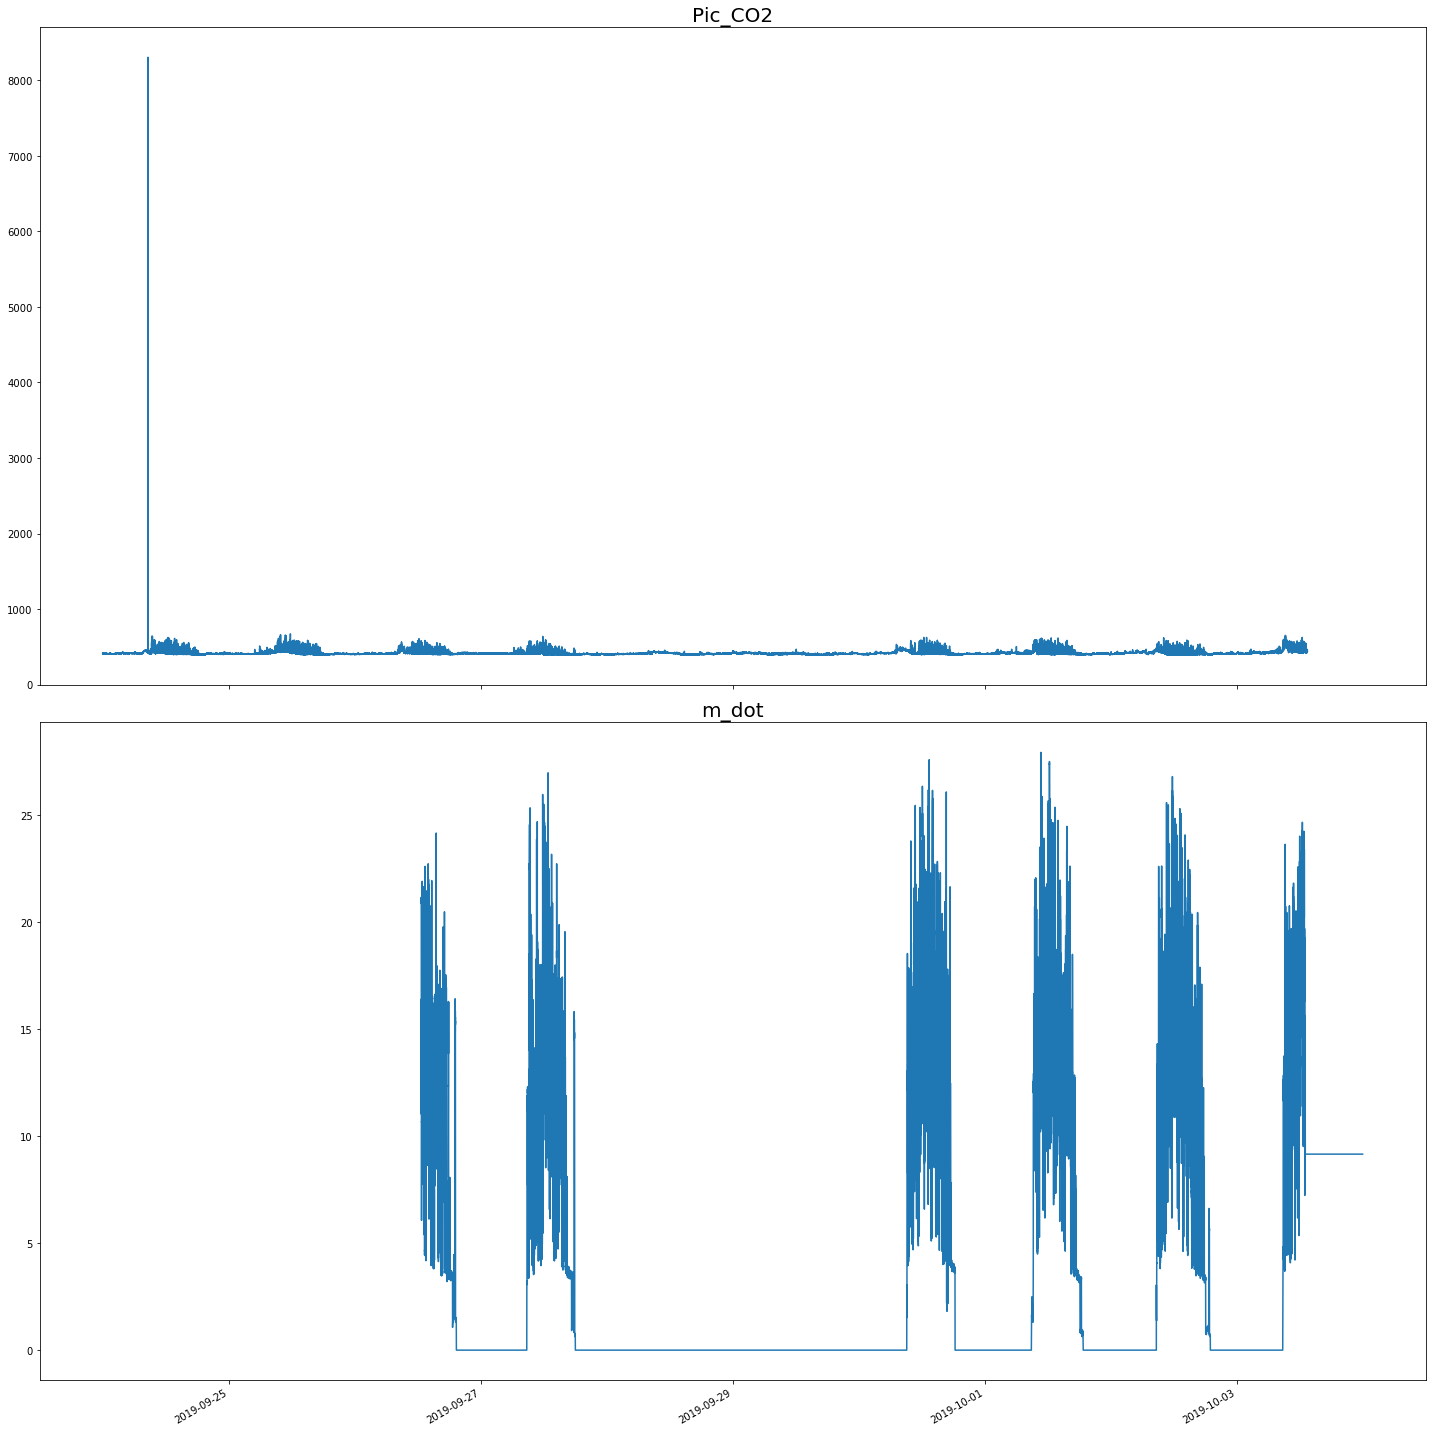

Is this an acceptable range?  n
Input Start DateTime as YYYY-mm-DD HH:MM:SS -  2019-09-26 12:00:00
Input End DateTime as YYYY-mm-DD HH:MM:SS -  2019-10-03 13:00:00


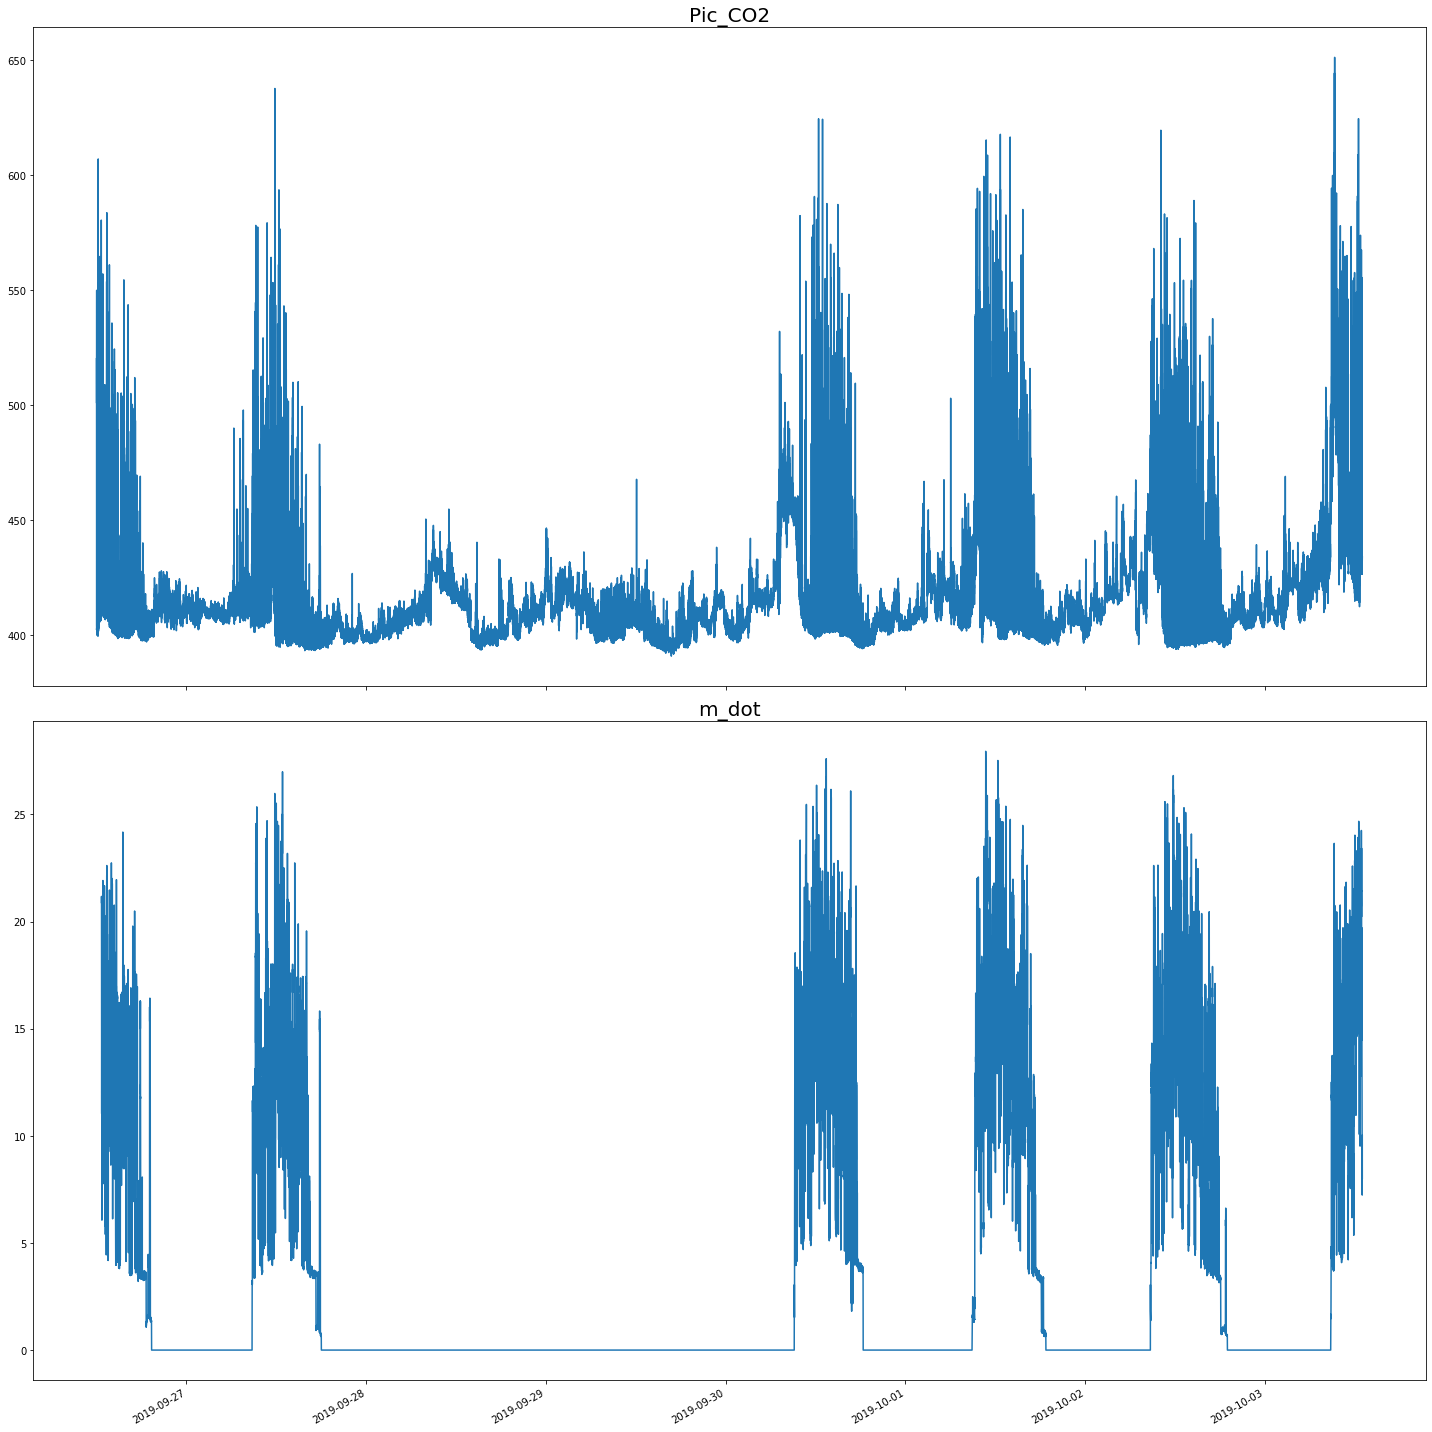

Is this an acceptable range?  y


In [5]:
pic,vent = plot_refinement_all([[all_data['Picarro'],'Corrected_DT','Pic_CO2'],[all_data['Vent_Mass'].interpolate(),'Corrected_DT','m_dot']],'separate')

In [6]:
pic1 = moving_average(pic,10)
vent1 = moving_average(vent,3600)
pic1 = dwn_sample(pic1,10)
vent1 = dwn_sample(vent1,10)

In [7]:
df = pd.concat([pic1,vent1],axis=1)
df = wind_add(df,'ANEM_X','ANEM_Y')
df.drop(['DOW','Pic_Loc','LI_CO2','Rotations','Velocity','Temp_1','Temp_2','Q','Excess'],axis=1,inplace=True)
df.dropna(inplace=True)

Adding Wind Direction as 'wd'
Adding Wind Speed as 'ws'


C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [8]:
cols = df.columns.tolist()
cols = cols[0:7]+cols[8:]+[cols[7]]
df = df[cols]


In [35]:
df1.tail(60)

,Corrected_DT,Pic_CO2,Pic_CH4,ANEM_Y,ANEM_X,ANEM_Z,WBB_CO2,WBB_CH4,wd,ws,m_dot,wd_ct
140,2019-10-03 12:20:20,448.002491,2.511320,0.543352,0.843503,0.123669,439.527526,2.040090,237.211932,1.192894,17.595315,0.0
141,2019-10-03 12:20:30,459.422124,2.343964,0.289542,1.181153,0.496063,439.568060,2.040270,256.226383,1.670403,17.622968,1.0
142,2019-10-03 12:20:40,470.344538,2.013896,0.314006,1.567657,0.500265,439.605512,2.040461,258.673374,2.217002,17.651724,2.0
143,2019-10-03 12:20:50,463.313142,2.003371,0.193892,1.668994,0.011940,439.640362,2.040625,263.373469,2.360314,17.679181,3.0
144,2019-10-03 12:21:00,463.158868,2.096337,0.233487,1.489402,0.271897,439.671754,2.040782,261.090521,2.106333,17.711829,4.0
145,2019-10-03 12:21:10,457.013172,2.083312,0.289688,1.252125,0.430259,439.704657,2.040935,256.973400,1.770772,17.750032,5.0
146,2019-10-03 12:21:20,457.291184,2.072049,0.520228,1.397123,0.140361,439.735632,2.041088,249.576861,1.975831,17.791744,6.0
147,2019-10-03 12:21:30,434.260694,1.911969,0.824321,1.191324,-0.192408,439.764349,2.041262,235.319213,1.684786,17.836511,0.0
148,2019-10-03 12:21:40,430.527205,1.908257,0.483907,1.072739,-0.305090,439.792774,2.041436,245.720104,1.517083,17.876004,1.0
149,2019-10-03 12:21:50,436.505270,1.976164,0.444903,0.985575,-0.184518,439.819482,2.041579,245.704894,1.393813,17.906822,2.0


In [9]:
df1 = df
df1['wd_ct'] = np.zeros(len(df1))
for i in range(1,len(df1)):
    if (df1['wd'][i] > 240) & (df1['wd'][i] < 300):
        df1['wd_ct'][i] = df1['wd_ct'][i-1]+1
    else:
        continue

In [33]:
df2 = df1.loc[df1['wd_ct']>0]

In [34]:
df2.drop('wd_ct',axis=1,inplace=True)

C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
#SET UP TIME LAGGING FUNTION
#Courtesy of Jason Brownlee
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (df.columns[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%d)' % (df.columns[j], i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
#We need to delete some of the columns generated by the series_to_supervised function
def delete_unwanted_cols(initial_lagged_df):
    #We want to delete all of the values of LI_CO2 EXCEPT the t=t case (very last one)
    s = "m_dot" 
    drop_cols = [] #initialize columns to be dropped
    for column in initial_lagged_df:
        if s not in column and "(t)" in column:
            drop_cols.append(column)     #Drop all columns except the LI_CO2 column at time t (only want the lagged variables)
        elif s in column and "(t)" not in column:
            drop_cols.append(column)     #Drop all columns with LI_CO2 that arent the last one
    return initial_lagged_df.drop(drop_cols,axis = 1)  

In [35]:
#TIME LAG
n_seconds = 2 #how many seconds to lag
n_features= len(df2.columns)-1 #how many features exist in the feature matrix (number of cols - target col)
time_lagged = series_to_supervised(df2,n_in=0,n_out=n_seconds) #lag function
time_lagged_reframed = delete_unwanted_cols(time_lagged) #delete unneccesary columns
#pd.set_option("display.max_columns", 9)
cols = list(time_lagged_reframed.columns)
cols = cols[1:] + [cols[0]]
time_lagged_reframed = time_lagged_reframed[cols]
time_lagged_reframed.head()

,Pic_CO2(t+1),Pic_CH4(t+1),ANEM_Y(t+1),ANEM_X(t+1),ANEM_Z(t+1),WBB_CO2(t+1),WBB_CH4(t+1),wd(t+1),ws(t+1),m_dot(t)
Corrected_DT,,,,,,,,,,
2019-09-26 13:11:40,414.504339,1.805716,-0.689778,1.835425,0.527098,422.880149,1.966244,290.596905,2.595684,13.191423
2019-09-26 13:11:50,432.136512,2.017557,0.299123,2.071531,0.321678,422.868779,1.966163,261.783441,2.929587,13.198566
2019-09-26 13:12:00,421.169132,1.960204,0.426413,2.304059,-0.158683,422.856054,1.966001,259.514881,3.258431,13.194830
2019-09-26 13:12:10,417.613033,1.841096,0.835944,2.321851,0.168576,422.840260,1.965914,250.199422,3.283593,13.191291
2019-09-26 13:12:20,415.035513,1.819917,0.976338,2.931154,0.088177,422.823990,1.965911,251.577601,4.145277,13.202047


In [159]:
time_dropped = time_lagged_reframed.copy()
for i in range(1,30):
    time_dropped = time_dropped.loc[(time_dropped['wd(t+{})'.format(i)]>240)&(time_dropped['wd(t+{})'.format(i)]<300)]

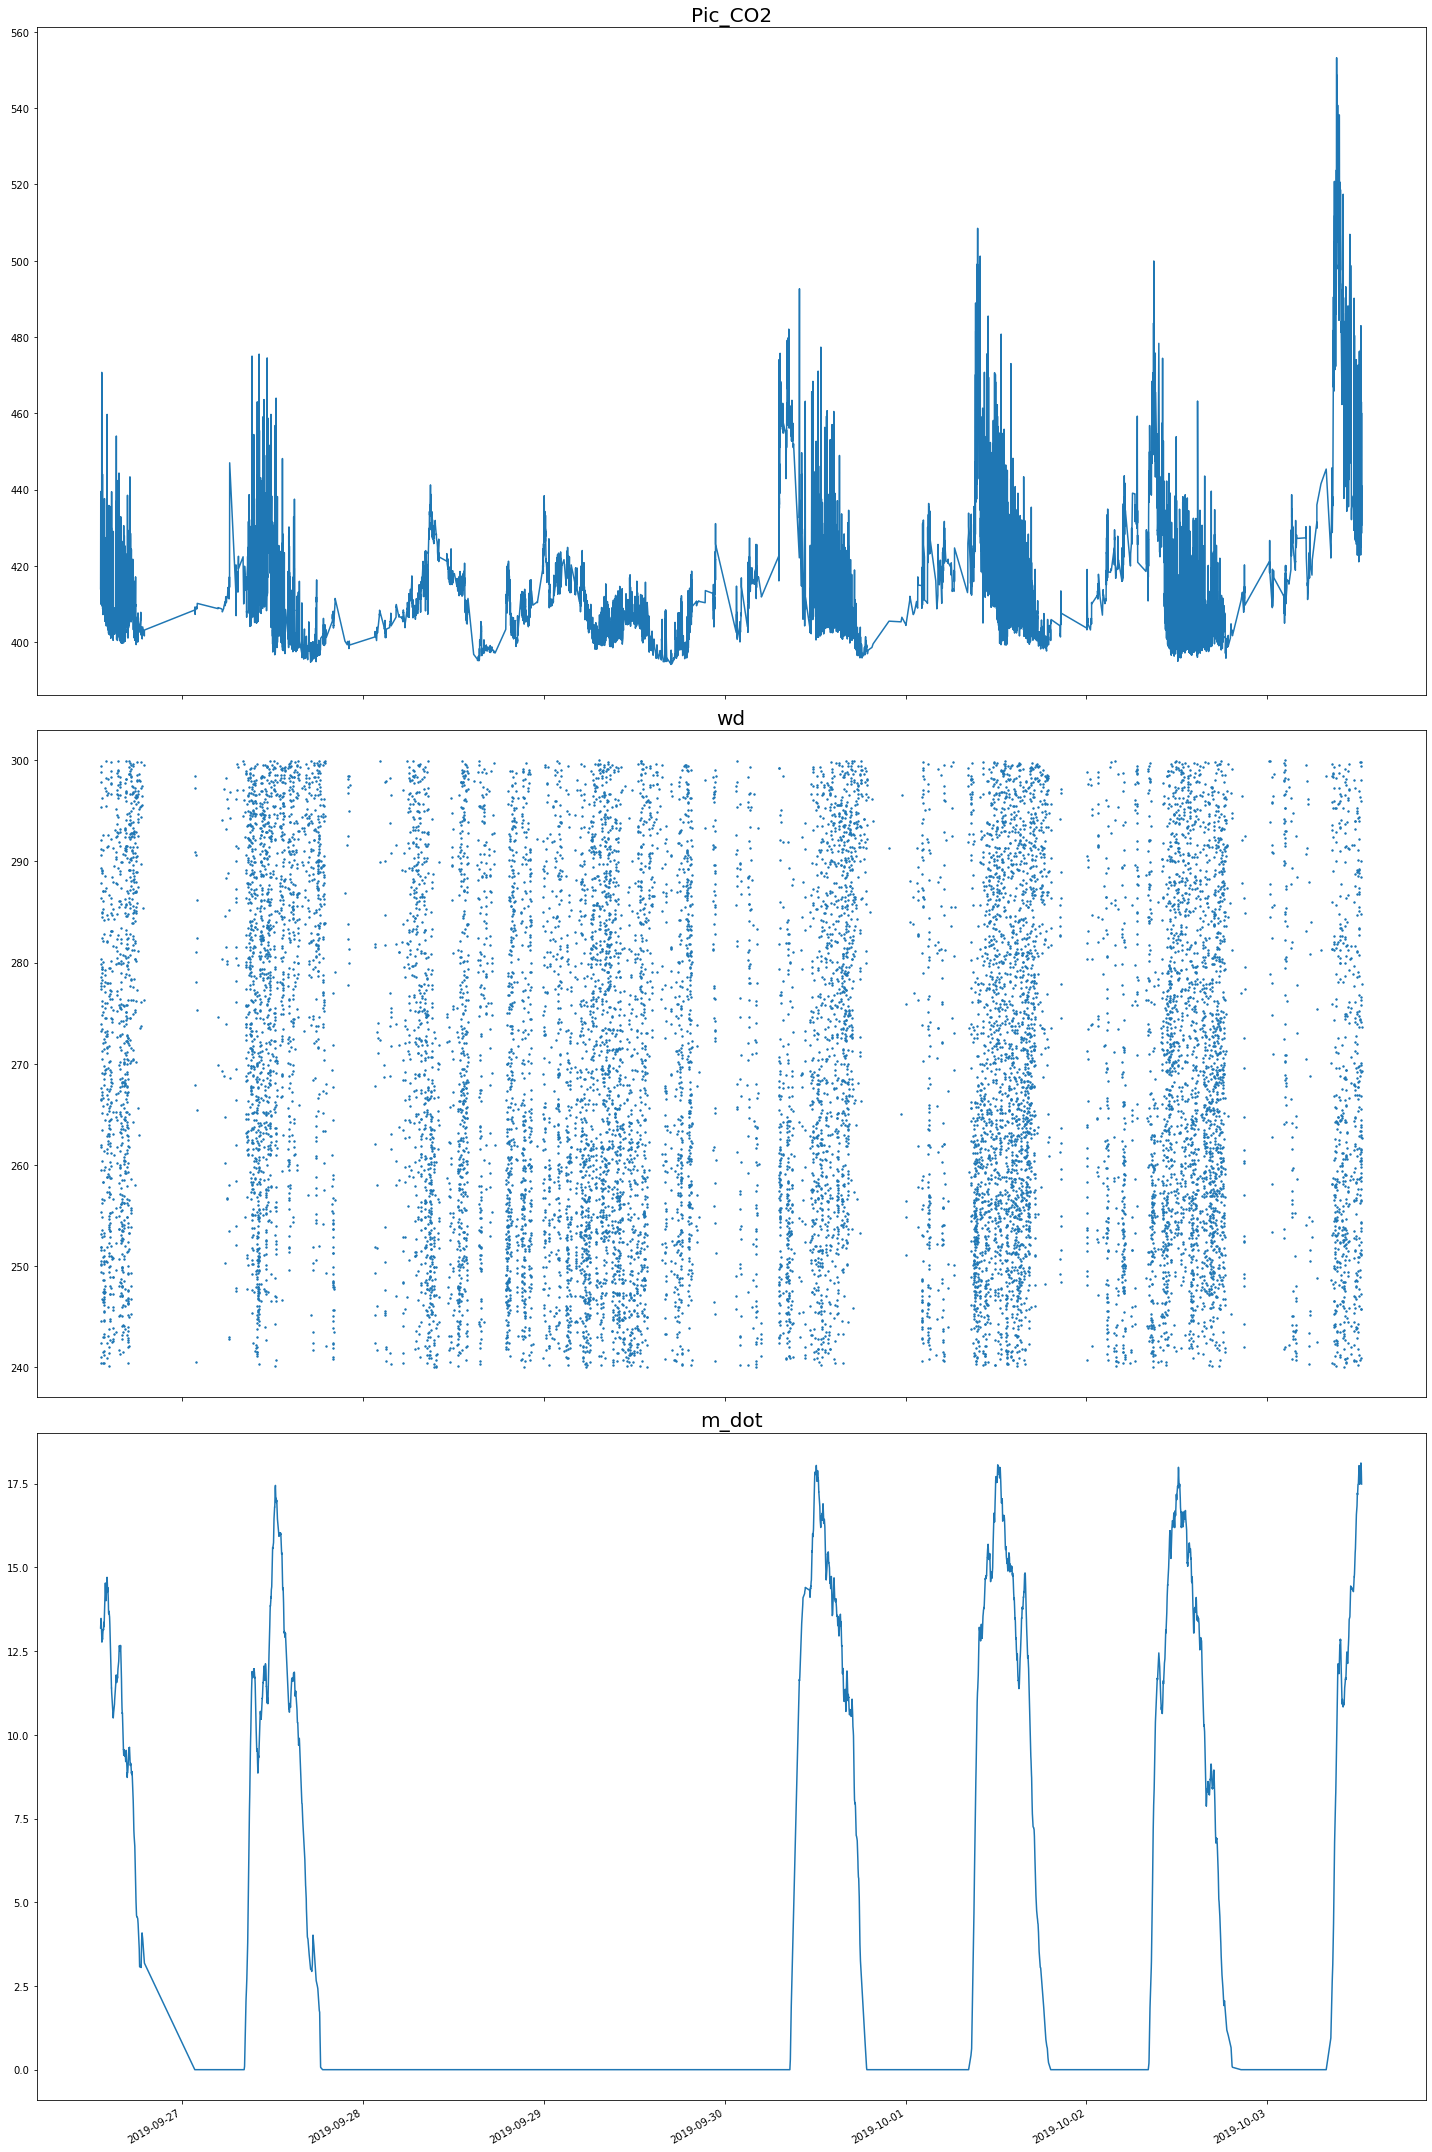

Is this an acceptable range?  y


[             Corrected_DT     Pic_CO2   Pic_CH4    ANEM_Y    ANEM_X    ANEM_Z  \
 0     2019-09-26 13:11:40  414.004018  1.786582  0.080019  1.262283  0.321544   
 1     2019-09-26 13:11:50  414.504339  1.805716 -0.689778  1.835425  0.527098   
 2     2019-09-26 13:12:00  432.136512  2.017557  0.299123  2.071531  0.321678   
 3     2019-09-26 13:12:10  421.169132  1.960204  0.426413  2.304059 -0.158683   
 4     2019-09-26 13:12:20  417.613033  1.841096  0.835944  2.321851  0.168576   
 ...                   ...         ...       ...       ...       ...       ...   
 15018 2019-10-03 12:29:30  454.828555  2.026086  0.472705  2.392812  0.123165   
 15019 2019-10-03 12:29:40  431.597269  1.888825  0.334986  2.616359 -0.183176   
 15020 2019-10-03 12:29:50  428.554342  1.869858 -0.418580  3.005321 -0.522570   
 15021 2019-10-03 12:30:00  441.731899  1.940694 -0.137794  2.196837 -0.108401   
 15022 2019-10-03 12:30:10  440.954299  1.937097  0.025223  2.051164 -0.094271   
 
           WBB

In [80]:
plot_refinement_all([[df,'Corrected_DT','Pic_CO2'],[df,'Corrected_DT','wd'],[df,'Corrected_DT','m_dot']],'separate')

In [36]:
#values = df2.dropna().values
values = time_lagged_reframed.dropna().values
min_max_scalar = preprocessing.MinMaxScaler()
values_scaled = min_max_scalar.fit_transform(values)

In [37]:
train_size = int(len(df2)*0.75)

In [38]:
train = values_scaled[:train_size,:]  #Get train/test arrays
test = values_scaled[train_size:,:]

In [39]:
X_train,y_train = train[:,:-1], train[:,-1] #Get feature/target arrays
X_test, y_test = test[:,:-1], test[:,-1]

In [40]:
#X_train = X_train.reshape((X_train.shape[0], 1, 9)) 
#X_test = X_test.reshape((X_test.shape[0], 1, 9))
X_train = X_train.reshape((X_train.shape[0], n_seconds-1, n_features)) 
X_test = X_test.reshape((X_test.shape[0], n_seconds-1, n_features))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11267, 1, 9) (11267,) (3755, 1, 9) (3755,)


In [41]:
model = Sequential()
model.add(LSTM(128,input_shape=(X_train.shape[1:]),activation = 'relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(loss='mse',optimizer=opt,metrics=['accuracy'])
model.fit(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Train on 11267 samples, validate on 3755 samples
Epoch 1/3
11267/11267 [==============================] - 9s 839us/sample - loss: 0.1190 - accuracy: 0.4995 - val_loss: 0.1065 - val_accuracy: 0.1598
Epoch 2/3
11267/11267 [==============================] - 3s 289us/sample - loss: 0.0903 - accuracy: 0.4995 - val_loss: 0.1212 - val_accuracy: 0.1601
Epoch 3/3
11267/11267 [==============================] - 3s 292us/sample - loss: 0.0825 - accuracy: 0.5015 - val_loss: 0.1236 - val_accuracy: 0.1593


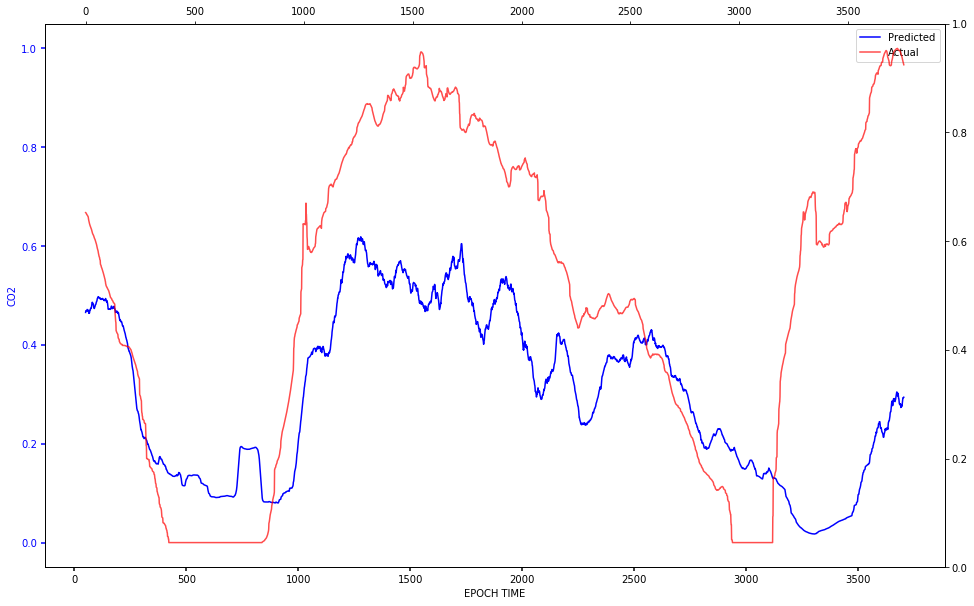

In [43]:
#PLOT PREDICTED VS OBSERVED
yfit = model.predict(X_test)
yfit = pd.DataFrame(yfit)
yfit_roll = yfit.rolling(100,center=True).mean()

fig, host = plt.subplots(figsize = (20,10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par1 = host.twiny()


p1, = host.plot(yfit_roll, "b-", label="Predicted")
p2, = par1.plot(y_test, "r-", alpha = 0.7,label="Actual")

host.set_xlabel("EPOCH TIME")
host.set_ylabel("CO2")
par1.set_ylabel("CO2")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines])

plt.show()